<a href="https://colab.research.google.com/github/purplekrayon/SMAP/blob/main/SMAPGeeAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Authenticate your cloud drive

In [1]:
from google.colab import auth
auth.authenticate_user()

Download and configure gcloud [only run once]

In [ ]:
!curl https://sdk.cloud.google.com | bash

In [ ]:
!gcloud init

2) Mount google drive: either using GUI to the left, or this command.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Full list of analytics files for download are here: gs://eartheinge-stats/providers/nasa_smap/index.txt

In [3]:
!gsutil cp gs://earthengine-stats/providers/nasa_smap/index.txt /content/drive/MyDrive/SMAP_GEE/csvfilelist.txt

Copying gs://earthengine-stats/providers/nasa_smap/index.txt...
/ [1 files][ 10.2 KiB/ 10.2 KiB]                                                
Operation completed over 1 objects/10.2 KiB.                                     


The file contents are a list of daily .csv files:
***
earthengine_stats_2023-02-15.csv\
earthengine_stats_2023-02-16.csv\
earthengine_stats_2023-02-17.csv\
earthengine_stats_2023-02-18.csv\
earthengine_stats_2023-02-19.csv\
earthengine_stats_2023-02-20.csv\
...
***


Each .csv file looks like this:
***
Interval,Dataset,30-day active users\
2023-01-17/2023-02-15,NASA/SMAP/SPL4SMGP/007,150\
2023-01-17/2023-02-15,NASA/SMAP/SPL3SMP_E/005,108
***

To read the files, use gsutil. You won't get charged for reading these files. Files are only readable by the google group smap_gee@googlegroups.com


3) Download all of the csv files listed in the file

In [ ]:
# reads index.txt from google cloud
# rstrip removes endline empty space that cause .csv files to end in "?"
# copies all files in csvfilelist.txt to local folder
import os,sys
import subprocess
env = os.environ.copy()
ccfile = open("drive/MyDrive/SMAP_GEE/csvfilelist.txt","r")

for line in ccfile:
  newfile = line.replace("gs://earthengine-stats/providers/nasa_smap/", "").rstrip()
  newfile_s = f'/content/drive/MyDrive/SMAP_GEE/CSV_GEE/{newfile}'
  cmd = "gsutil cp -n gs://earthengine-stats/providers/nasa_smap/" + newfile + " " + newfile_s
  !{cmd}

ccfile.close()


4) read all csv files and reformat data into only 2 output files. L3outstats.txt
L4outstats.txt

In [8]:
import subprocess
import re
infile = open("drive/MyDrive/SMAP_GEE/csvfilelist.txt",'r' )
L3out = open("drive/MyDrive/SMAP_GEE/L3outstats.txt","a")
L3out.seek(0) #sets a point at the beginning of the file
L3out.truncate() #clears file contents at beginning
L4out = open("drive/MyDrive/SMAP_GEE/L4outstats.txt","a")
L4out.seek(0) #sets a point at the beginning of the file
L4out.truncate() #clears file contents at beginning

# read csv files from csvfilelist.txt
# need to check if file has lines 2 and 3, if not, skip
for file in infile:
	newfile = file.replace("gs://earthengine-stats/providers/nasa_smap/", "").rstrip()
	newfile_s = f'/content/drive/MyDrive/SMAP_GEE/CSV_GEE/{newfile}'
	# open file, remove extra character at the end and save as geefile
	with open(newfile_s.rstrip()) as geefile:
		#create empty list called contentlist
		contentlist = []
		# for contents of geefile, add each line to contentlist and remove extra space as end
		for item in geefile:
			contentlist.append(item)
			#geefile = open(file.rstrip(),"r")
			#temptext = geefile.readlines()
			#store second line in variable, L4
			#print(contentlist)

		lenghtlist = len(contentlist)
		#test of the file has valid contents
		if lenghtlist == 3:
			L4 = contentlist[1].strip()
			# create list of the three strings in each line seperated by ','
			L4split = re.split(r',|/|;', L4)
			#print(L4split[0])
			#print(L4split[2])
			#print(L4split[2])
			#print L4 to file
			L4out.write(L4split[0] + '\t' + L4split[1] + '\t' +L4split[6] + '\n')

			# store second line in variable, L4
			L3 =contentlist[2].strip()
			L3split = re.split(r',|/|;', L3)
			#print L3 to file
			L3out.write(L3split[0] + '\t' + L3split[1] + '\t' +L3split[6] + '\n')
		else:
			L4out.write(L4split[0] + '\tnan\tnan\n')
			L3out.write(L3split[0] + '\tnan\tnan\n')

	geefile.close()

infile.close()
L3out.close()
L4out.close()

5) Read output text files and plot data

('2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19', '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24', '2023-03-25', 'nan', '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30', '2023-03-31', '2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04', '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08', '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12', '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16', '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20', '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24', '2023-04-25', '2023-04-26', '2023-04-27'

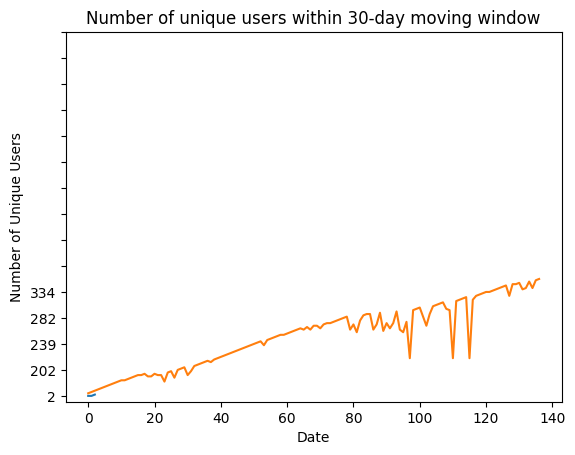

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
# https://stackoverflow.com/questions/36455083/how-to-plot-and-work-with-nan-values-in-matplotlib
#create empty arrays
datelist = []
valuelist = []

# open text files
#L3stats = "drive/MyDrive/SMAP_GEE/L3outstats.txt"
#L4stats = open("drive/MyDrive/SMAP_GEE/L4outstats.txt","r")

with open("drive/MyDrive/SMAP_GEE/L3outstats.txt") as inf:
    reader = csv.reader(inf, delimiter="\t")
    L3date = list(zip(*reader))[1]

print(L3date)

with open("drive/MyDrive/SMAP_GEE/L3outstats.txt") as inf:
    #reader = csv.reader(inf, delimiter="\t")
    #working on reading in tab data. not working with nan
    reader=pd.read_csv(inf, delimiter='\t', na_values="nan")
    L3value = list(zip(*reader))[2]
print(L3value)

# trying to interpolate over NaN here
#L3valuetest=pd.L3value
#L3valuetest = L3value.fillna(method='ffill', limit=3)

with open("drive/MyDrive/SMAP_GEE/L4outstats.txt") as inf:
    reader = csv.reader(inf, delimiter="\t")
    L4value = list(zip(*reader))[2]
#print(L4value)

y1 = L3value
y2 = L4value
x = np.arange(len(y1))
#x = L3date
fig, ax = plt.subplots()
ax.plot(x,y1,y2)
#plt.plot(x, y1, y2, '-')
#plt.plot(y1, y2, '-')
#plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
ax.set_xlabel('Date')
ax.set_yticks(np.arange(0, 300, step=20))  # Set label locations.
ax.set_ylabel('Number of Unique Users')
plt.title("Number of unique users within 30-day moving window")
plt.show()


